In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
from pycocotools.mask import *
import pickle
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='../coco/'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

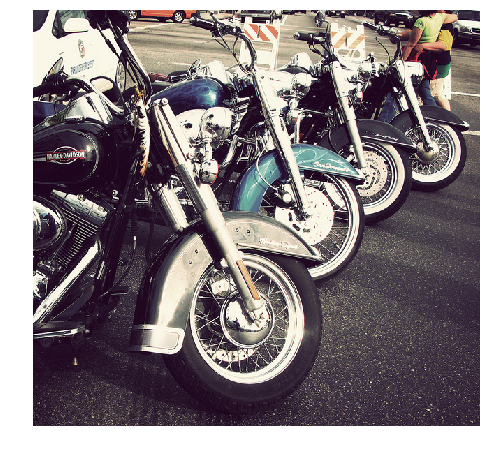

In [3]:
filename="%012d.jpg"%21685
I = io.imread(dataDir + 'images/' + dataType +'/'+filename)
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...


KeyboardInterrupt: 

In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

In [ ]:
# get all images containing person,
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds.sort()
print len(imgIds)
print imgIds[:10]

In [ ]:
#Example of an image which has person
imgIds = coco.getImgIds(imgIds = [21685])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
#print img
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print len(anns)
mask=coco.annToMask(anns[1])
coco.showAnns(anns)

In [ ]:
im = np.array(I)
mask=np.array(mask)
print mask.shape
print im.shape
mask3 = np.swapaxes(np.swapaxes(np.array([mask,mask,mask]),0,1),1,2)
#mask3= np.ones((mask.shape[0],mask.shape[1],3))
#mask3[:,:,0] = mask3[:,:,0]*mask
#mask3[:,:,1] = mask3[:,:,1]*mask
#mask3[:,:,2] = mask3[:,:,2]*mask

maskimg = np.multiply(im,mask3)

In [ ]:
plt.axis('off')
plt.imshow(maskimg)
plt.show()

In [ ]:
imgIds = coco.getImgIds(imgIds = [21685])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
filename="%012d.jpg"%21685
I = io.imread(dataDir + 'images/' + dataType +'/'+filename)
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns1 = coco.loadAnns(annIds)
print len(anns)
mask1=coco.annToMask(anns1[1])

imgIds2 = coco.getImgIds(imgIds = [36])
img2 = coco.loadImgs(imgIds2[np.random.randint(0,len(imgIds2))])[0]
I2 = io.imread(img2['coco_url'])
plt.axis('off')
plt.imshow(I2)
plt.show()

annIds2 = coco.getAnnIds(imgIds=img2['id'], catIds=catIds, iscrowd=None)
anns2 = coco.loadAnns(annIds2)
print len(anns2)
mask2=coco.annToMask(anns2[0])

In [ ]:
print area(encode(mask1))
print area(encode(mask2))

In [ ]:
rle1= encode(mask1)
type(toBbox(rle1))
print(toBbox(rle1))

In [ ]:
#rle1= coco.annToRLE(anns1[1])
#rle2= coco.annToRLE(anns2[0])
rle1= encode(mask1)
rle2= encode(mask2)
#type(toBbox(rle1))
iou([toBbox(rle1)],[toBbox(rle2)],[1])

In [ ]:
# catIds = coco.getCatIds(catNms=['person']);
# imgIds = coco.getImgIds(catIds=catIds );
# imgIds.sort()
# imgIds=imgIds[:100]
# bestmatch = [[0 for i in range(len(imgIds))] for j in range(len(imgIds))]
# for i in range(len(imgIds)):
#     ma=-1
#     imgIds1 = coco.getImgIds(imgIds = [imgIds[i]])
#     img1 = coco.loadImgs(imgIds1[np.random.randint(0,len(imgIds1))])[0]
#     annIds1 = coco.getAnnIds(imgIds=img1['id'], catIds=catIds, iscrowd=None)
#     anns1 = coco.loadAnns(annIds1)
#     mask1=coco.annToMask(anns1[0])
#     rle1= encode(mask1)
#     bb1 = toBbox(rle1)
#     for j in range(len(imgIds)):
#         if i==j:
#             continue
#         imgIds2 = coco.getImgIds(imgIds = [imgIds[j]])
#         img2 = coco.loadImgs(imgIds2[np.random.randint(0,len(imgIds2))])[0]
#         annIds2 = coco.getAnnIds(imgIds=img2['id'], catIds=catIds, iscrowd=None)
#         anns2 = coco.loadAnns(annIds2)
#         mask2=coco.annToMask(anns2[0])
#         rle2= encode(mask2)
#         bb2 = toBbox(rle2)
#         bestmatch[i][j]= iou([bb1],[bb2],[1])
#         print iou([bb1],[bb2],[1])

# pickle.dump(bestmatch,open('bestmatch.txt','w+'))

In [ ]:
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds.sort()
imgIds2 = coco.getImgIds(imgIds = [imgIds[113]])
img = coco.loadImgs(imgIds2[np.random.randint(0,len(imgIds2))])[0]
I = io.imread(img['coco_url'])
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print len(anns)
mask=coco.annToMask(anns[0])
coco.showAnns([anns[0]])

In [ ]:
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds.sort()
val=[]
for i in range(113,114):
    imgIds2 = coco.getImgIds(imgIds = [imgIds[i]])
    img = coco.loadImgs(imgIds2[np.random.randint(0,len(imgIds2))])[0]
    imgIds1 = coco.getImgIds(imgIds = [imgIds[i]])
    img1 = coco.loadImgs(imgIds1[np.random.randint(0,len(imgIds1))])[0]
    annIds1 = coco.getAnnIds(imgIds=img1['id'], catIds=catIds, iscrowd=None)
    bb1 = toBbox(encode(coco.annToMask(coco.loadAnns(annIds1)[0])))
    for j in range(len(imgIds)):
        if i==j:
            continue
        imgIds2 = coco.getImgIds(imgIds = [imgIds[j]])
        img2 = coco.loadImgs(imgIds2[np.random.randint(0,len(imgIds2))])[0]
        annIds2 = coco.getAnnIds(imgIds=img2['id'], catIds=catIds, iscrowd=None)
        bb2 = toBbox(encode(coco.annToMask(coco.loadAnns(annIds2)[0])))
        val.append([iou([bb1],[bb2],[1])[0][0],imgIds[j]])

In [ ]:
from operator import itemgetter, attrgetter
#sorted(val, key=itemgetter(0), reverse=True);
val.sort(key=itemgetter(0), reverse=True)

In [ ]:
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds.sort()


for i in range(10):
    imgIds2 = coco.getImgIds(imgIds = [val[i][1]])
    img = coco.loadImgs(imgIds2[np.random.randint(0,len(imgIds2))])[0]
    I = io.imread(img['coco_url'])
    plt.axis('off')
    plt.imshow(I)
    plt.show()